In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import tomopy

# Path to the download folder
scan_244_folder = '/home/ravescovi/Downloads/NSLS2/scan_00244'

# List all files in the download folder
files = os.listdir(scan_244_folder)
print(files)

# panda = os.path.join(scan_244_folder, 'panda.hdf')
# panda_data = h5py.File(panda, 'r').keys()
# print(panda_data)

print('main file')
main_file = os.path.join(scan_244_folder, 'scan_00244.nxs')

proj_file = os.path.join(scan_244_folder, 'proj_00000.hdf')
data_images = h5py.File(proj_file, 'r')['entry']['data']['data']
angles = h5py.File(main_file, 'r')['entry']['data']['rotation_angle']
##
print(data_images)
print(angles)


# Path to the download folder
scan_245_folder = '/home/ravescovi/Downloads/NSLS2/scan_00245'

# List all files in the download folder
files = os.listdir(scan_245_folder)
print(files)

main_file = os.path.join(scan_245_folder, 'scan_00245.nxs')
print("Data files paths:", main_file)
main_info = h5py.File(main_file, 'r')['entry']['data'].keys()
print(main_info)

##
print("Flat and dark files:")
##
flat_file = os.path.join(scan_245_folder, 'flat_00000.hdf')
print("Flat file path:", flat_file)
flat_images = h5py.File(flat_file, 'r')['entry']['data']['data']
print(flat_images)
##
dark_file = os.path.join(scan_245_folder, 'dark_00000.hdf')
print("Dark file path:", dark_file)
dark_images = h5py.File(dark_file, 'r')['entry']['data']['data']
print(dark_images)

['proj_00000.hdf', 'panda.hdf', 'scan_00244.nxs']
main file
<HDF5 dataset "data": shape (1801, 3200, 3200), type "<u2">
<HDF5 dataset "rotation_angle": shape (1801,), type "<f4">
['flat_00000.hdf', 'dark_00000.hdf', 'scan_00245.nxs']
Data files paths: /home/ravescovi/Downloads/NSLS2/scan_00245/scan_00245.nxs
<KeysViewHDF5 ['dark', 'flat']>
Flat and dark files:
Flat file path: /home/ravescovi/Downloads/NSLS2/scan_00245/flat_00000.hdf
<HDF5 dataset "data": shape (50, 3200, 3200), type "<u2">
Dark file path: /home/ravescovi/Downloads/NSLS2/scan_00245/dark_00000.hdf
<HDF5 dataset "data": shape (20, 3200, 3200), type "<u2">


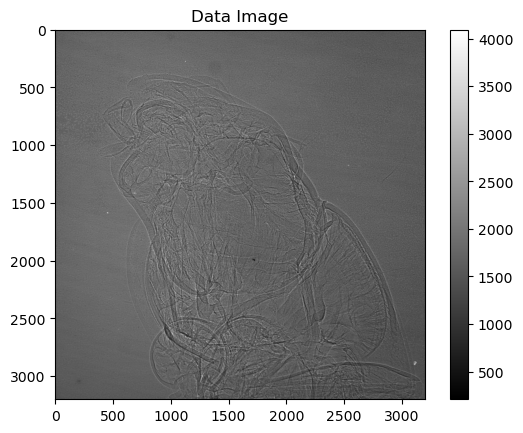

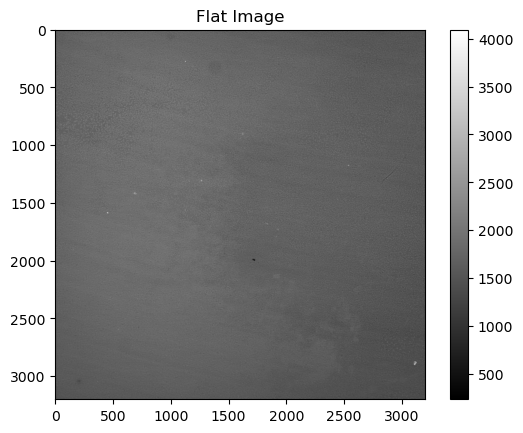

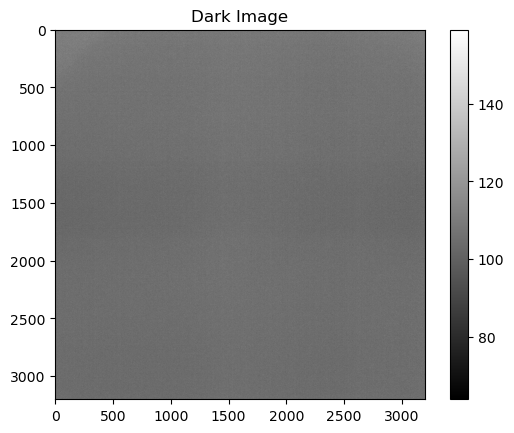

In [2]:

# Show one of the data images
plt.imshow(data_images[0,:,:], cmap='gray')
plt.title('Data Image')
plt.colorbar()
plt.show()

# Show one of the data images
plt.imshow(flat_images[0,:,:], cmap='gray')
plt.title('Flat Image')
plt.colorbar()
plt.show()

# Show one of the data images
plt.imshow(dark_images[0,:,:], cmap='gray')
plt.title('Dark Image')
plt.colorbar()
plt.show()

In [3]:
# Set data collection angles as equally spaced between 0-180 degrees.
proj_norm = tomopy.normalize(data_images, flat_images, dark_images)
print(proj_norm.shape)


(1801, 3200, 3200)


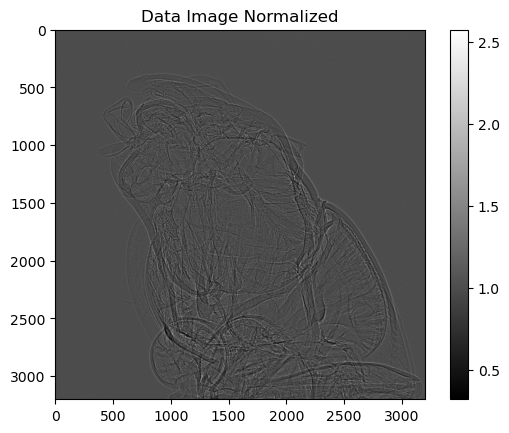

In [4]:
# Show one of the data images
plt.imshow(proj_norm[0,:,:], cmap='gray')
plt.title('Data Image Normalized')
plt.colorbar()
plt.show()


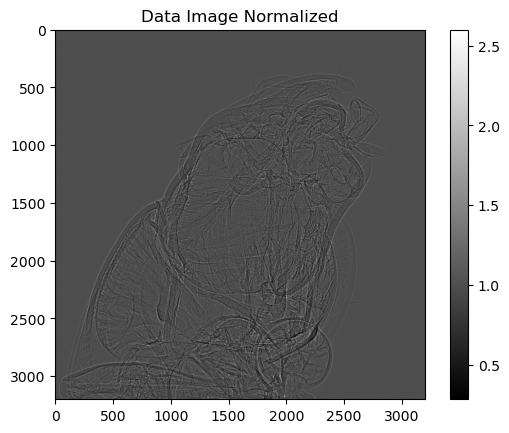

In [5]:

# Show one of the data images
plt.imshow(proj_norm[-1,:,:], cmap='gray')
plt.title('Data Image Normalized')
plt.colorbar()
plt.show()

In [6]:

# Set data collection angles as equally spaced between 0-180 degrees.
rot_center = tomopy.find_center_vo(proj_norm)
print(rot_center)


1609.25


In [7]:

## log normalization
proj_norm_ml = tomopy.minus_log(proj_norm)
print(proj_norm_ml.shape)

(1801, 3200, 3200)


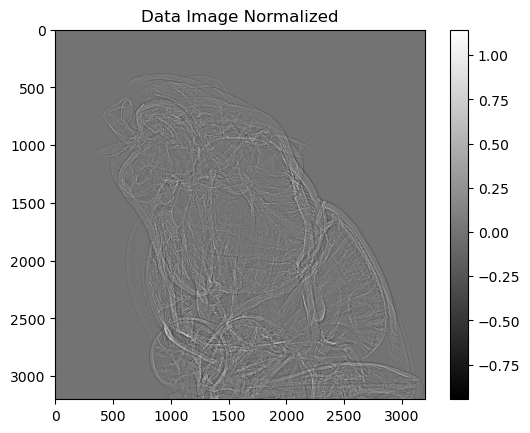

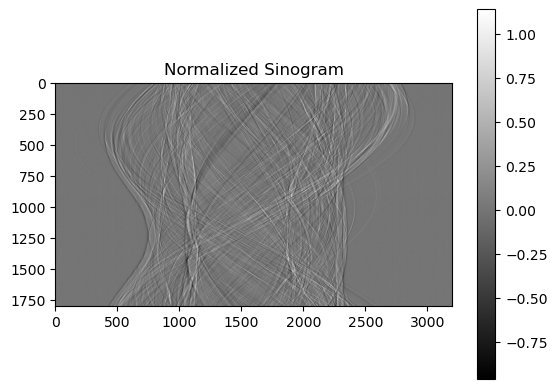

In [8]:

# Show one of the data images
plt.imshow(proj_norm_ml[0,:,:], cmap='gray')
plt.title('Data Image Normalized')
plt.colorbar()
plt.show()
# Show one of the data images
plt.imshow(proj_norm_ml[:,2000,:], cmap='grey')
plt.title('Normalized Sinogram')
plt.colorbar()
plt.show()

In [ ]:
tomo = tomopy.recon(proj_norm_ml, angles, center=rot_center, algorithm='gridrec')
print(tomo.shape)

In [ ]:
# Plot cross sections of tomo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the middle slice in each dimension
axes[0].imshow(tomo[tomo.shape[0] // 2, :, :], cmap='gray')
axes[0].set_title('Cross Section along Z-axis')

axes[1].imshow(tomo[:, tomo.shape[1] // 2, :], cmap='gray')
axes[1].set_title('Cross Section along Y-axis')

axes[2].imshow(tomo[:, :, tomo.shape[2] // 2], cmap='gray')
axes[2].set_title('Cross Section along X-axis')

plt.tight_layout()
plt.show()